# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [46]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [32]:
base = "http://api.openweathermap.org/data/2.5/weather?q="

In [49]:
import time

dfcity = []
dfcloud = []
dfcountry = []
dfdate = []
dfhum =[]
dflat = []
dflng =[]
dfmaxtemp =[]
dfwind = []
start = 1
end = len(cities)

print("Beginning Data Retrieval")
print("----------------------------")
for city in cities:
    response = requests.get(base + city + 
          "&appid=" + api_key +
            "&units=imperial")
    if response.status_code == 200:
        data = response.json()
        dfcity.append(data['name'])
        dfcloud.append(data['clouds']['all'])
        dfcountry.append(data['sys']['country'])
        dfdate.append(data['dt'])
        dfhum.append(data['main']['humidity'])
        dflat.append(data['coord']['lat'])
        dflng.append(data['coord']['lon'])
        dfmaxtemp.append(data['main']['temp_max'])
        dfwind.append(data['wind']['speed'])
        print(f"Processing Record {start} | {(data['name'])}")
        start = start + 1
    else:
        print("City not found. Skipping...")
        end = end - 1
    time.sleep(1.02)
print("-----------------------------")
print(f"Data Retrieval Complete. Total of {end} Records Loaded.")
print("-----------------------------")

Beginning Data Retrieval
----------------------------
Processing Record 1 | Klaksvik
Processing Record 2 | Jamestown
City not found. Skipping...
Processing Record 3 | Sept-Iles
Processing Record 4 | San Felipe
Processing Record 5 | Barrow
Processing Record 6 | Dikson
Processing Record 7 | Souillac
Processing Record 8 | Albany
Processing Record 9 | Ushuaia
Processing Record 10 | Kloulklubed
Processing Record 11 | Kahului
City not found. Skipping...
Processing Record 12 | Merauke
Processing Record 13 | Huambo
City not found. Skipping...
City not found. Skipping...
Processing Record 14 | Meulaboh
Processing Record 15 | Bredasdorp
Processing Record 16 | Clyde River
Processing Record 17 | Port Hedland
Processing Record 18 | Hermanus
Processing Record 19 | Atuona
City not found. Skipping...
Processing Record 20 | Avarua
Processing Record 21 | Nikolskoye
City not found. Skipping...
Processing Record 22 | Morgan City
Processing Record 23 | Ban Nahin
Processing Record 24 | Norman Wells
Processi

Processing Record 222 | Dingle
Processing Record 223 | Eregli
Processing Record 224 | Ilhabela
Processing Record 225 | Rio Tercero
Processing Record 226 | Omboue
Processing Record 227 | Harnosand
Processing Record 228 | Jaumave
Processing Record 229 | Margate
Processing Record 230 | Mehran
Processing Record 231 | San Patricio
Processing Record 232 | Geraldton
Processing Record 233 | Sudogda
Processing Record 234 | Darhan
Processing Record 235 | Karak
Processing Record 236 | Zihuatanejo
Processing Record 237 | Komsomolskiy
Processing Record 238 | Hambantota
Processing Record 239 | Isangel
Processing Record 240 | Ucluelet
Processing Record 241 | Coahuayana
Processing Record 242 | Airai
Processing Record 243 | Polyarnyye Zori
Processing Record 244 | Honningsvag
Processing Record 245 | Petropavlovsk-Kamchatskiy
Processing Record 246 | Lorengau
Processing Record 247 | Araouane
Processing Record 248 | Gambissara
Processing Record 249 | Adrar
Processing Record 250 | Mmabatho
City not found. S

Processing Record 452 | Broome
Processing Record 453 | Atbasar
Processing Record 454 | Bonavista
Processing Record 455 | Constitucion
City not found. Skipping...
Processing Record 456 | Huarmey
Processing Record 457 | Seddon
Processing Record 458 | Muros
Processing Record 459 | Maumere
Processing Record 460 | Yeppoon
Processing Record 461 | Mahanoro
Processing Record 462 | Churapcha
Processing Record 463 | Kreminna
Processing Record 464 | Magadan
Processing Record 465 | Muyezerskiy
Processing Record 466 | Lodja
Processing Record 467 | Keti Bandar
Processing Record 468 | Bijar
Processing Record 469 | Aksum
Processing Record 470 | Saint-Denis
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 471 | Tefe
Processing Record 472 | Ajdabiya
Processing Record 473 | General Roca
Processing Record 474 | Kruisfontein
Processing Record 475 | Nanortalik
Processing Record 476 | Maldonado
Processing Record 477 | Ereymentau
Processing Record 478 | Ale

In [50]:
print(dfcity)
print(dfcloud)
print(dfcountry)
print(dfdate)
print(dfhum)
print(dflat)
print(dflng)
print(dfmaxtemp)
print(dfwind)

['Klaksvik', 'Jamestown', 'Sept-Iles', 'San Felipe', 'Barrow', 'Dikson', 'Souillac', 'Albany', 'Ushuaia', 'Kloulklubed', 'Kahului', 'Merauke', 'Huambo', 'Meulaboh', 'Bredasdorp', 'Clyde River', 'Port Hedland', 'Hermanus', 'Atuona', 'Avarua', 'Nikolskoye', 'Morgan City', 'Ban Nahin', 'Norman Wells', 'Novikovo', 'Victoria', 'Puerto Ayora', 'Sao Joao da Barra', 'Punta Arenas', 'Umm Kaddadah', 'Portland', 'Biltine', 'Coihaique', 'Cape Town', 'Totoro', 'Bambous Virieux', 'Point Pedro', 'Abu Zabad', 'Cidreira', 'Castro', 'Sioux Lookout', 'Necocli', 'Karratha', 'Qaanaaq', 'Port Alfred', 'Manokwari', 'Rikitea', 'Cherskiy', 'Abalak', 'Butaritari', 'Cabo San Lucas', 'Mataura', 'Yellowknife', 'Ivankiv', 'Hobart', 'Port Hueneme', 'New Norfolk', 'Haapiti', 'Wanning', 'Lebu', 'Port Macquarie', 'Camacha', 'Aden', 'Kapaa', 'Banikoara', 'Eirunepe', 'Prachin Buri', 'Bilibino', 'Sorochinsk', 'Saint George', 'Pevek', 'Chimbote', 'Port Elizabeth', 'San Quintin', 'Hilo', 'Ancud', 'Praia', 'Ribeira Grande', 

In [51]:
print(len(dfcity))
print(len(dfcloud))
print(len(dfcountry))
print(len(dfdate))
print(len(dfhum))
print(len(dflat))
print(len(dflng))
print(len(dfmaxtemp))
print(len(dfwind))

549
549
549
549
549
549
549
549
549


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [52]:
output_df = pd.DataFrame({"City" : dfcity,
                         "Cloudiness" : dfcloud,
                         "Country" : dfcountry,
                         "Date": dfdate,
                         "Humidity" : dfhum,
                         "Lat": dflat,
                         "Lng": dflng,
                         "Max Temp" : dfmaxtemp,
                         "Wind Speed" : dfwind})
output_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Klaksvik,100,FO,1566788880,100,62.23,-6.59,51.80,17.22
1,Jamestown,21,AU,1566788882,51,-33.21,138.60,54.24,5.37
2,Sept-Iles,6,CA,1566788606,75,50.20,-66.38,57.99,2.66
3,San Felipe,100,CL,1566788885,91,-32.75,-70.73,55.99,1.99
4,Barrow,94,AR,1566788887,77,-38.31,-60.23,54.96,6.29


In [53]:
output_df.to_csv("output_data/cities.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [54]:
lattemp_df = output_df[["Lat", "Max Temp"]]
lattemp_df.head()

,Lat,Max Temp
0,62.23,51.80
1,-33.21,54.24
2,50.20,57.99
3,-32.75,55.99
4,-38.31,54.96


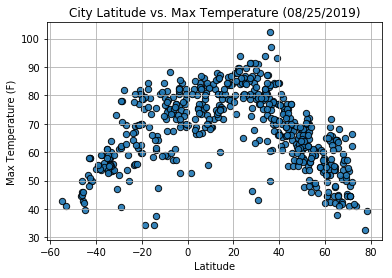

In [72]:
lattemp_df.plot.scatter(x = "Lat",
                       y = "Max Temp",edgecolors = "black", alpha = .9, s=40)
plt.title("City Latitude vs. Max Temperature (08/25/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

#### Latitude vs. Humidity Plot

In [73]:
lathum_df = output_df[["Lat", "Humidity"]]
lathum_df.head()

,Lat,Humidity
0,62.23,100
1,-33.21,51
2,50.20,75
3,-32.75,91
4,-38.31,77


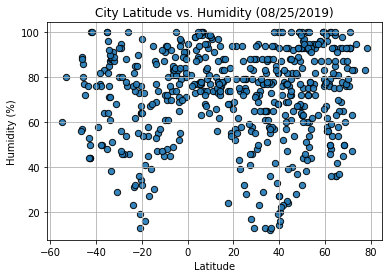

In [74]:
lathum_df.plot.scatter(x = "Lat",
                       y = "Humidity",edgecolors = "black", alpha = .9, s=40)
plt.title("City Latitude vs. Humidity (08/25/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

#### Latitude vs. Cloudiness Plot

In [75]:
latcld_df = output_df[["Lat", "Cloudiness"]]
latcld_df.head()

,Lat,Cloudiness
0,62.23,100
1,-33.21,21
2,50.20,6
3,-32.75,100
4,-38.31,94


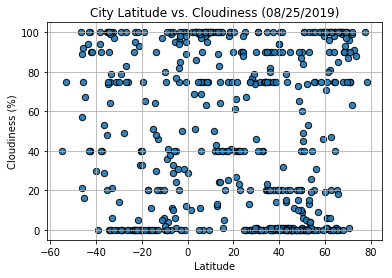

In [76]:
latcld_df.plot.scatter(x = "Lat",
                       y = "Cloudiness",edgecolors = "black", alpha = .9, s=40)
plt.title("City Latitude vs. Cloudiness (08/25/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

#### Latitude vs. Wind Speed Plot

In [79]:
latwnd_df = output_df[["Lat", "Wind Speed"]]
latwnd_df.head()

,Lat,Wind Speed
0,62.23,17.22
1,-33.21,5.37
2,50.20,2.66
3,-32.75,1.99
4,-38.31,6.29


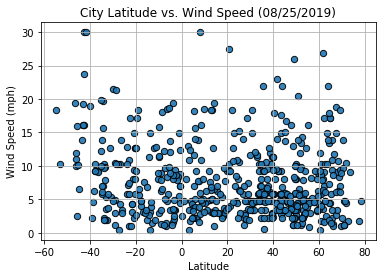

In [81]:
latwnd_df.plot.scatter(x = "Lat",
                       y = "Wind Speed",edgecolors = "black", alpha = .9, s=40)
plt.title("City Latitude vs. Wind Speed (08/25/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()